In [1]:
from sympy import Symbol, init_printing, conjugate, sin, cos, factor, Matrix
from sympy import lambdify, Symbol, symbols
from sympy.physics.quantum import Dagger
init_printing()

In [2]:
from diagram_v2 import all_diagrams


--- Calculating H10 Interactions ---

--- Calculating Z1 Interactions ---

--- Defining Lepton Interactions with charged fields ---

Refactored script execution finished.


INFO: --- Creating Diagram: triangle_ni_GLp_GLm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_L^+}}-{{G_L^-}}) coupling found: -k_1*(\alpha_1**2 + 2*\alpha_1*\alpha_3 + \alpha_3**2 - 4*\lambda_1*\rho_1 - 4*\lambda_2*\rho_1)/\rho_1
INFO: Vertex 2 ({{G_L^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*T_{RL}[i, b]/k_1, R=sqrt(2)*conjugate(Q_L[b, i])*m_\ell[b]/k_1
INFO: Vertex 3 ({{G_L^-}}-\overline{\ell}[a]-n[i]) coupling found: L=sqrt(2)*Q_L[a, i]*m_\ell[a]/k_1, R=-sqrt(2)*conjugate(T_{RL}[i, a])/k_1
INFO: Mass List for TriangleFSS: [m_{H_1^0}, m_\ell[a], m_\ell[b], mn[i], m_{W_1}, m_{W_1}]
INFO: Successfully created triangle_ni_GLp_GLm (FSS)
INFO: --- Creating Diagram: triangle_ni_GRp_GRm (FSS) ---
INFO: Vertex 1 ({{H_1^0}}-{{G_R^+}}-{{G_R^-}}) coupling found: -k_1**3*(\alpha_1**2 + 2*\alpha_1*\alpha_3 + \alpha_3**2 - 4*\lambda_1*\rho_1 - 4*\lambda_2*\rho_1)/(\rho_1*v_R**2)
INFO: Vertex 2 ({{G_R^+}}-\overline{n}[i]-\ell[b]) coupling found: L=-sqrt(2)*conjugate(Q_R[b, i])*m_\ell[b]/v_

28 diagrams created and stored in all_diagrams dictionary.


In [3]:
list(all_diagrams.keys())

['ni_GLp_GLm',
 'ni_GRp_GRm',
 'ni_HRp_HRm',
 'ni_GRp_HRm',
 'ni_HRp_GRm',
 'ni_W1p_W1m',
 'ni_W2p_W2m',
 'ni_W1p_GLm',
 'ni_W2p_GRm',
 'ni_W2p_HRm',
 'ni_GLp_W1m',
 'ni_GRp_W2m',
 'ni_HRp_W2m',
 'ni_W1',
 'ni_W2',
 'W1_ni',
 'W2_ni',
 'ni_GL',
 'ni_GR',
 'ni_HR',
 'GL_ni',
 'GR_ni',
 'HR_ni',
 'GL_ninj',
 'GR_ninj',
 'HR_ninj',
 'W1_ninj',
 'W2_ninj']

In [4]:
all_diagrams['ni_GLp_GLm'].AL().atoms(Symbol)

In [5]:
freesymbols = set()
for interaction, diagram in all_diagrams.items():
    freesymbols |= diagram.AL().atoms(Symbol)

In [6]:
freesymbols

We have the following definitions
$$
Q_{L}^{\dagger} = U_{L}^{\dagger}V_{L}^{\ell}\\
Q_{R}^{\dagger} = U_{R}^{\top}V_{R}^{\ell}
$$
in the case of $V_{L}^{\ell} = V_{R}^{\ell} = \mathbf{I}$, we have

$$
Q_{L}^{\dagger} = U_{L}^{\dagger}\\
Q_{R}^{\dagger} = U_{R}^{\top}
$$

In [7]:
from DLRSM1.block_diagonalization_iss import ULmni, URmni, USmni, I3, eigenvalsMnu, mNi_changes, epsilon, mNi
from DLRSM1.block_diagonalization_iss import dict_Mii2, dict_muii, dict_Mii2_sqrt, dict_sqrt_muii_MDi, dict_Mii, mns_dummys, dummys_mns
from DLRSM1.block_diagonalization_iss import Unu

Key: M[0, 0]**2, Value: m_{n_4}*(m_{n_4} - mu[0, 0])


Key: M[1, 1]**2, Value: m_{n_5}*(m_{n_5} - mu[1, 1])


Key: M[2, 2]**2, Value: m_{n_6}*(m_{n_6} - mu[2, 2])




In [8]:
URmat = URmni
URT = URmat.T
URc = conjugate(URmat)
URDagger = Dagger(URmat)
ULmat = ULmni
ULT = ULmat.T
ULc = conjugate(ULmat)
ULDagger = Dagger(ULmat)
USmat = USmni
UST = USmat.T
USc = conjugate(USmat)
USDagger = Dagger(USmat)
Vl = I3

In [9]:
eigenvalsMnu = eigenvalsMnu.subs(mNi_changes)

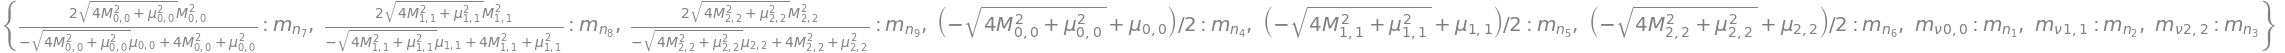

In [10]:
mNi_changes

In [11]:
dict_Mii

In [12]:
(-mNi[4] + mNi[7]).subs(
    {
        val:key for key, val in mNi_changes.items()
    }
).factor().subs(dict_sqrt_muii_MDi).subs(dict_Mii2).subs(dict_muii).factor()

In [13]:
GRLmat = (URT*conjugate(URmat)*(eigenvalsMnu)*ULDagger*ULc).applyfunc(
    lambda x:x.factor()
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)

GSRmat = (USDagger*USc*(eigenvalsMnu)*URDagger*URc).applyfunc(
    lambda x:x.factor()
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)

In [14]:
GRLmat

⎡                      0                                               0       ↪
⎢                                                                              ↪
⎢                      0                                               0       ↪
⎢                                                                              ↪
⎢                      0                                               0       ↪
⎢                                                                              ↪
⎢   _________                                       _________                  ↪
⎢ ╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)⋅U_{\nu}_00    ╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\eps ↪
⎢ ────────────────────────────────────────────    ──────────────────────────── ↪
⎢              ___________________                             _______________ ↪
⎢            ╲╱ m_{n_4} - m_{n_7}                            ╲╱ m_{n_4} - m_{n ↪
⎢                                                                              ↪
⎢   _________               

In [15]:
GSRmat

⎡             _________                                       _________        ↪
⎢         ⅈ⋅╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)⋅U_{\nu}_00  ⅈ⋅╲╱ m_{n_5} ⋅m_{n_8 ↪
⎢0  0  0  ──────────────────────────────────────────────  ──────────────────── ↪
⎢                       ____________________                            ______ ↪
⎢                     ╲╱ -m_{n_4} + m_{n_7}                           ╲╱ -m_{n ↪
⎢                                                                              ↪
⎢             _________                                       _________        ↪
⎢         ⅈ⋅╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)⋅U_{\nu}_01  ⅈ⋅╲╱ m_{n_5} ⋅m_{n_8 ↪
⎢0  0  0  ──────────────────────────────────────────────  ──────────────────── ↪
⎢                       ____________________                            ______ ↪
⎢                     ╲╱ -m_{n_4} + m_{n_7}                           ╲╱ -m_{n ↪
⎢                                                                              ↪
⎢             _________     

In [16]:
from DLRSM1.potential_senjanovic_HiggsDoublets import alpha1, alpha2, alpha3, lamb1, lamb2, rho1, k1, vR, mHR, mH10
from DLRSM1.Gauge_Higgs_senjanovic_HiggsDoublets import mW1, mW2, g

In [17]:
a13 = alpha1 + alpha3
Gamma_mat = (GRLmat - ((a13)/(2*rho1))*epsilon**2*Dagger(GSRmat)).subs(mns_dummys).simplify().subs(dummys_mns).applyfunc(
    lambda x:x.subs(sin(epsilon)**2, epsilon**2).factor(deep=True)
)

Omega_mat = (Gamma_mat + Gamma_mat.T).applyfunc(lambda x:x.expand().collect(rho1, factor))#.replace(epsilon**2,0)

In [18]:
Omega_mat

⎡                                                                              ↪
⎢                                                                              ↪
⎢                                                               0              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                               0              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

In [19]:
QLDagger = (ULDagger*Vl).subs(mns_dummys).simplify().subs(dummys_mns)
QLmat = Dagger(QLDagger).subs(mns_dummys).simplify().subs(dummys_mns)

QRDagger = (URT*Vl).subs(mns_dummys).simplify().subs(dummys_mns)
QRmat = Dagger(QRDagger).subs(mns_dummys).simplify().subs(dummys_mns)

In [20]:
(QRmat*QRDagger).applyfunc(factor)

⎡           ⅈ⋅(m_{n_4} + m_{n_7})                                              ↪
⎢────────────────────────────────────────────                       0          ↪
⎢  ____________________   ___________________                                  ↪
⎢╲╱ -m_{n_4} + m_{n_7} ⋅╲╱ m_{n_4} - m_{n_7}                                   ↪
⎢                                                                              ↪
⎢                                                         ⅈ⋅(m_{n_5} + m_{n_8} ↪
⎢                     0                        ─────────────────────────────── ↪
⎢                                                ____________________   ______ ↪
⎢                                              ╲╱ -m_{n_5} + m_{n_8} ⋅╲╱ m_{n_ ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                     0                                             0          ↪
⎢                           

In [21]:
from sympy import eye

In [22]:
UUD = (Unu*Dagger(Unu)).as_explicit()
Iden3 = eye(3)
unitarity_Unu = {
    UUD[i,j]:Iden3[i,j] for i in range(3) for j in range(3)
}
unitarity_Unu

In [23]:
(QLmat*QLDagger).applyfunc(lambda x:x.expand().collect(mNi, factor).subs(unitarity_Unu))

⎡             2                        2                                       ↪
⎢  m_{n_4}⋅sin (\epsilon)   m_{n_7}⋅sin (\epsilon)                             ↪
⎢- ────────────────────── - ────────────────────── + 1                         ↪
⎢    m_{n_4} - m_{n_7}        m_{n_4} - m_{n_7}                                ↪
⎢                                                                              ↪
⎢                                                                    2         ↪
⎢                                                         m_{n_5}⋅sin (\epsilo ↪
⎢                          0                            - ──────────────────── ↪
⎢                                                           m_{n_5} - m_{n_8}  ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                          0

In [24]:
SRLmat = (QRmat*(eigenvalsMnu)*ULDagger*ULmat).applyfunc(
    lambda x:x.factor()
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
SRLDagger = Dagger(SRLmat).subs(mns_dummys).simplify().subs(dummys_mns)
SRLmat

⎡                                                                              ↪
⎢     _________   _________               __________       _________   _______ ↪
⎢-ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_00  -ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7 ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢     _________   _________               __________       _________   _______ ↪
⎢-ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n_8} ⋅sin(\epsilon)⋅U_{\nu}_10  -ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n_8 ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

In [25]:
#(SRLmat*Dagger(SRLmat)).applyfunc(factor).subs(mns_dummys).simplify().subs(dummys_mns).subs(unitarity_Unu)#.subs(epsilon, 0)
(SRLmat*SRLDagger).applyfunc(lambda x:x.simplify()).subs(unitarity_Unu)

⎡                ⎛             2                          2               ____ ↪
⎢m_{n_4}⋅m_{n_7}⋅⎝ⅈ⋅m_{n_4}⋅sin (\epsilon) + ⅈ⋅m_{n_7}⋅sin (\epsilon) + ╲╱ -m_ ↪
⎢───────────────────────────────────────────────────────────────────────────── ↪
⎢                                             ____________________   _________ ↪
⎢                                           ╲╱ -m_{n_4} + m_{n_7} ⋅╲╱ m_{n_4}  ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                 0            ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

In [26]:
TRLmat = (URT*URc*(eigenvalsMnu)*QLDagger).applyfunc(
    lambda x:x.factor()
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
TRLDagger = Dagger(TRLmat).subs(mns_dummys).simplify().subs(dummys_mns)
TRLDagger

⎡             _________                                                        ↪
⎢         ⅈ⋅╲╱ m_{n_4} ⋅m_{n_7}⋅sin(\epsilon)                                  ↪
⎢0  0  0  ───────────────────────────────────                   0              ↪
⎢                 ____________________                                         ↪
⎢               ╲╱ -m_{n_4} + m_{n_7}                                          ↪
⎢                                                                              ↪
⎢                                                  _________                   ↪
⎢                                              ⅈ⋅╲╱ m_{n_5} ⋅m_{n_8}⋅sin(\epsi ↪
⎢0  0  0                   0                   ─────────────────────────────── ↪
⎢                                                      ____________________    ↪
⎢                                                    ╲╱ -m_{n_5} + m_{n_8}     ↪
⎢                                                                              ↪
⎢                           

In [27]:
TSRmat = (USDagger*USc*(eigenvalsMnu)*URDagger*Vl).applyfunc(
    lambda x:x.factor()
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
TSRDagger = Dagger(TSRmat).subs(mns_dummys).simplify().subs(dummys_mns)
TSRDagger

⎡                                                                              ↪
⎢     _________   _________               __________       _________   _______ ↪
⎢-ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_00  -ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7 ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢     _________   _________               __________       _________   _______ ↪
⎢-ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n_8} ⋅sin(\epsilon)⋅U_{\nu}_10  -ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n_8 ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢                           

In [28]:
Kmat = (SRLmat - epsilon**2*TSRDagger).applyfunc(
    lambda x:x.factor()
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
KDagger = Dagger(Kmat).subs(mns_dummys).simplify().subs(dummys_mns)


Jmat = (TSRDagger + SRLmat).applyfunc(
    lambda x:x.factor()
).subs(dict_Mii2).subs(dict_muii).subs(dict_Mii2_sqrt).applyfunc(
    lambda x:x.factor(deep=True)
).subs(mns_dummys).simplify().subs(dummys_mns)
JDagger = Dagger(Jmat).subs(mns_dummys).simplify().subs(dummys_mns)


In [29]:
KDagger.subs(sin(epsilon)**2, epsilon**2)

⎡    _________   _________ ⎛            2⎞                               _____ ↪
⎢ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅⎝1 - \epsilon ⎠⋅sin(\epsilon)⋅U_{\nu}_00  ⅈ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢    _________   _________ ⎛            2⎞                               _____ ↪
⎢ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅⎝1 - \epsilon ⎠⋅sin(\epsilon)⋅U_{\nu}_01  ⅈ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢    _________   _________ ⎛            2⎞                               _____ ↪
⎢ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅⎝1 - \epsilon ⎠⋅sin(\epsilon)⋅U_{\nu}_02  ⅈ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢                           2           _________                              ↪
⎢                -2⋅\epsilon ⋅m_{n_4}⋅╲╱ m_{n_7}                               ↪
⎢                ─────────────────────────────────                             ↪
⎢                       ____

In [30]:
JDagger.subs(cos(epsilon),1)

⎡      _________   _________                                 _________   _____ ↪
⎢2⋅ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_00  2⋅ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢      _________   _________                                 _________   _____ ↪
⎢2⋅ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_01  2⋅ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢      _________   _________                                 _________   _____ ↪
⎢2⋅ⅈ⋅╲╱ m_{n_4} ⋅╲╱ m_{n_7} ⋅sin(\epsilon)⋅U_{\nu}_02  2⋅ⅈ⋅╲╱ m_{n_5} ⋅╲╱ m_{n ↪
⎢                                                                              ↪
⎢                          _________                                           ↪
⎢                m_{n_4}⋅╲╱ m_{n_7}                                            ↪
⎢               ──────────────────────                                         ↪
⎢                 __________

In [31]:
from neutrinos import UpmnsStandardParametrization, NuOscObservables
Nudata = NuOscObservables
th12,th13,th23 = symbols(r'\theta_{12}, \theta_{13}, \theta_{23}')
mixing_angles = Nudata().substitutions(th12,th13,th23)
c12,c13,c23 = cos(th12), cos(th13), cos(th23)
s12,s13,s23 = sin(th12), sin(th13), sin(th23)
Upmns_val = UpmnsStandardParametrization(th12,th13,th23).subs(mixing_angles)

Unu_changes = {
        Unu[i,j]:Upmns_val[i,j] for i in range(3) for j in range(3)
    }

In [32]:
from DLRSM1.FeynmanRules_senjanovic_H10_Z1_GM import QL, QR, TRL, K, J, Omega, ml, mn, i, j, a, b

In [33]:
from LFVXD.PaVe2 import D as Dim

In [34]:
Dim

In [103]:
mla, mlb, mni = symbols('m_{l_a}, m_{l_b}, m_{n_i}', positive=True)

QLai = symbols('Q_{Lai}')
QLbi = symbols('Q_{Lbi}')
QLaic = symbols(r'\overline{Q_{Lai}}')
QLbic = symbols(r'\overline{Q_{Lbi}}')
QRai = symbols('Q_{Rai}')
QRbi = symbols('Q_{Rbi}')
QRaic = symbols(r'\overline{Q_{Rai}}')
QRbic = symbols(r'\overline{Q_{Rbi}}')
TRLib = symbols('T_{RLib}')
TRLia = symbols('T_{RLia}')
TRLiac  = symbols(r'\overline{T_{RLia}}')
TRLibc  = symbols(r'\overline{T_{RLib}}')
Jai = symbols('J_{ai}')
Jbi = symbols('J_{bi}')
Jaic = symbols(r'\overline{J_{ai}}')
Jbic = symbols(r'\overline{J_{bi}}')
Kai = symbols('K_{ai}')
Kbi = symbols('K_{bi}')
Kaic = symbols(r'\overline{K_{ai}}')
Kbic = symbols(r'\overline{K_{bi}}')
alpha13 = symbols(r'\alpha_{13}') # alpha1 + alpha3
lamb12 = symbols(r'\lambda_{12}') # lamb1 + lamb2
alpha12 = symbols(r'\alpha_{12}') # alpha1 + alpha2 > 0
alpha23 = symbols(r'\alpha_{23}') # alpha2 - alpha3 > 0


symbolic_changes = {
    ml[a]:mla,
    ml[b]:mlb,
    mn[i]:mni,
    QL[a,i]:QLai,
    QL[b,i]:QLbi,
    conjugate(QL[a, i]):QLaic,
    conjugate(QL[b, i]):QLbic,
    QR[a,i]:QRai,
    QR[b,i]:QRbi,
    conjugate(QR[a, i]):QRaic,
    conjugate(QR[b, i]):QRbic,
    TRL[i, a]:TRLia,
    TRL[i, b]:TRLib,
    conjugate(TRL[i, a]):TRLiac,
    conjugate(TRL[i, b]):TRLibc,
    J[a,i]:Jai,
    J[b,i]:Jbi,
    conjugate(J[a,i]):Jaic,
    conjugate(J[b,i]):Jbic,
    K[a,i]:Kai,
    K[b,i]:Kbi,
    conjugate(K[a,i]):Kaic,
    conjugate(K[b,i]):Kbic,
    Dim:4,
    alpha1 + alpha3: alpha13,
    alpha2 - alpha3: alpha23,
    alpha1 + alpha2: alpha12,
    2*lamb1 + 2*lamb2: 2*lamb12,
    lamb1 + lamb2: lamb12
}
bubbles = ['ni_GL', 'GL_ni', 'ni_GR', 'GR_ni', 'ni_HR', 'HR_ni', 'ni_W1', 'W1_ni', 'ni_W2', 'W2_ni']
bubble_diagrams = {interaction:all_diagrams[interaction] for interaction in bubbles}
symbolic_formfactor_bubble = {
    interaction:{
        'AL':diagram.AL().factor().subs(symbolic_changes),
        'AR':diagram.AR().factor().subs(symbolic_changes)
    } for interaction, diagram in bubble_diagrams.items()
}

triangles_onefermion = ['ni_GLp_GLm', 'ni_GRp_GRm', 'ni_W1p_W1m', 'ni_W2p_W2m']
triangle_diagrams_onefermion = {interaction:all_diagrams[interaction] for interaction in triangles_onefermion}
symbolic_formfactor_triangle_onefermion = {
    interaction:{
        'AL':diagram.AL().expand().collect(
            [rho1], factor
        ).subs(symbolic_changes),
        'AR':diagram.AR().expand().collect(
            [rho1], factor
        ).subs(symbolic_changes)
    } for interaction, diagram in triangle_diagrams_onefermion.items()
}

symbolic_formfactor_triangle_onefermion['ni_HRp_HRm'] = {}
symbolic_formfactor_triangle_onefermion['ni_HRp_HRm']['AL'] = all_diagrams['ni_HRp_HRm'].AL().expand().collect(
            [rho1], lambda x: x.collect([vR], lambda x:x.factor())
        ).subs(symbolic_changes)
symbolic_formfactor_triangle_onefermion['ni_HRp_HRm']['AR'] = all_diagrams['ni_HRp_HRm'].AR().expand().collect(
            [rho1], lambda x: x.collect([vR], lambda x:x.factor())
        ).subs(symbolic_changes)

symbolic_formfactor ={
    **symbolic_formfactor_bubble,
    **symbolic_formfactor_triangle_onefermion
}

In [105]:
symbolic_formfactor['ni_W2p_W2m']['AR'].atoms(Symbol)

In [48]:
from LFVXD.numeric.qcdloop_pv import B1_0, B2_0, B1_1, B2_1, C0_, C1_, C2_


      ____  __________  __                    
     / __ \/ ____/ __ \/ /   ____  ____  ____ 
    / / / / /   / / / / /   / __ \/ __ \/ __ \
   / /_/ / /___/ /_/ / /___/ /_/ / /_/ / /_/ /
   \___\_\____/_____/_____/\____/\____/ .___/ 
                                     /_/      
   ___git___: 2.1.0 | __authors__: S.C., K.E., G.Z.


In [49]:
# Passarino-Veltman functions definitions
pv_functions = {
    'B1_0':B1_0,
    'B2_0':B2_0,
    'B1_1':B1_1,
    'B2_1':B2_1,
    'C0': C0_,
    'C1': C1_,
    'C2': C2_
}

In [107]:
function_formfactors = {
    'ni_GL':{
        'AL':lambdify(
    [QLai, QLbic, TRLib, TRLiac, mW1, mni, mla, mlb, k1],
    symbolic_formfactor['ni_GL']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QLai, QLbic, TRLib, TRLiac, mW1, mni, mla, mlb, k1],
    symbolic_formfactor['ni_GL']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'GL_ni':{
        'AL':lambdify(
    [QLbi, QLaic, TRLia, TRLibc, mW1, mni, mla, mlb, k1],
    symbolic_formfactor['GL_ni']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QLbi, QLaic, TRLia, TRLibc, mW1, mni, mla, mlb, k1],
    symbolic_formfactor['GL_ni']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_GR':{
        'AL':lambdify(
    [QRai, QRbic, Jai, Jbic, mW2, mni, mla, mlb, k1, vR],
    symbolic_formfactor['ni_GR']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRai, QRbic, Jai, Jbic, mW2, mni, mla, mlb, k1, vR],
    symbolic_formfactor['ni_GR']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'GR_ni':{
        'AL':lambdify(
    [QRbi, QRaic, Jbi, Jaic, mW2, mni, mla, mlb, k1, vR],
    symbolic_formfactor['GR_ni']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRbi, QRaic, Jbi, Jaic, mW2, mni, mla, mlb, k1, vR],
    symbolic_formfactor['GR_ni']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_HR':{
        'AL':lambdify(
    [QRai, QRbic, Kai, Kbic, mHR, mni, mla, mlb, k1],
    symbolic_formfactor['ni_HR']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRai, QRbic, Kai, Kbic, mHR, mni, mla, mlb, k1],
    symbolic_formfactor['ni_HR']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'HR_ni':{
        'AL':lambdify(
    [QRbi, QRaic, Kbi, Kaic, mHR, mni, mla, mlb, k1],
    symbolic_formfactor['HR_ni']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRbi, QRaic, Kbi, Kaic, mHR, mni, mla, mlb, k1],
    symbolic_formfactor['HR_ni']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_W1':{
        'AL':lambdify(
    [QLai, QLbic, mW1, mni, mla, mlb, k1, g],
    symbolic_formfactor['ni_W1']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QLai, QLbic, mW1, mni, mla, mlb, k1, g],
    symbolic_formfactor['ni_W1']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'W1_ni':{
        'AL':lambdify(
    [QLbi, QLaic, mW1, mni, mla, mlb, k1, g],
    symbolic_formfactor['W1_ni']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QLbi, QLaic, mW1, mni, mla, mlb, k1, g],
    symbolic_formfactor['W1_ni']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_W2':{
        'AL':lambdify(
    [QRai, QRbic, mW2, mni, mla, mlb, k1, g],
    symbolic_formfactor['ni_W2']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRai, QRbic, mW2, mni, mla, mlb, k1, g],
    symbolic_formfactor['ni_W2']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'W2_ni':{
        'AL':lambdify(
    [QRbi, QRaic, mW2, mni, mla, mlb, k1, g],
    symbolic_formfactor['W2_ni']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRbi, QRaic, mW2, mni, mla, mlb, k1, g],
    symbolic_formfactor['W2_ni']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_GLp_GLm':{
        'AL':lambdify(
    [QLai, QLbic, TRLib, TRLiac, mW1, mH10, mni, mla, mlb, k1, rho1, alpha13, lamb12],
    symbolic_formfactor['ni_GLp_GLm']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QLai, QLbic, TRLib, TRLiac, mW1, mH10, mni, mla, mlb, k1, rho1, alpha13, lamb12],
    symbolic_formfactor['ni_GLp_GLm']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_GRp_GRm':{
        'AL':lambdify(
    [QRai, QRbic, Jai, Jbic, mW2, mH10, mni, mla, mlb, k1, vR, rho1, alpha13, lamb12],
    symbolic_formfactor['ni_GRp_GRm']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRai, QRbic, Jai, Jbic, mW2, mH10, mni, mla, mlb, k1, vR, rho1, alpha13, lamb12],
    symbolic_formfactor['ni_GRp_GRm']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_HRp_HRm':{
        'AL':lambdify(
    [QRai, QRbic, Kai, Kbic, mHR, mH10, mni, mla, mlb, k1, vR, rho1, alpha13, alpha12, alpha23, lamb12],
    symbolic_formfactor['ni_HRp_HRm']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRai, QRbic, Kai, Kbic, mHR, mH10, mni, mla, mlb, k1, vR, rho1, alpha13, alpha12, alpha23, lamb12],
    symbolic_formfactor['ni_HRp_HRm']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_W1p_W1m':{
        'AL':lambdify(
    [QLai, QLbic, mW1, mH10, mni, mla, mlb, k1, g],
    symbolic_formfactor['ni_W1p_W1m']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QLai, QLbic, mW1, mH10, mni, mla, mlb, k1, g],
    symbolic_formfactor['ni_W1p_W1m']['AR'], modules=[pv_functions,'mpmath']
    )
    },
    'ni_W2p_W2m':{
        'AL':lambdify(
    [QRai, QRbic, mW2, mH10, mni, mla, mlb, k1, g, rho1, alpha13],
    symbolic_formfactor['ni_W2p_W2m']['AL'], modules=[pv_functions,'mpmath']
    ),
        'AR':lambdify(
    [QRai, QRbic, mW2, mH10, mni, mla, mlb, k1, g, rho1, alpha13],
    symbolic_formfactor['ni_W2p_W2m']['AR'], modules=[pv_functions,'mpmath']
    )
    },
}

In [108]:
symbolic_formfactor['ni_W2p_W2m']['AR'].atoms(Symbol)


In [109]:
function_formfactors['ni_W2p_W2m']['AL'](1,2,3,4,5,6,7,8,9,10,11)

mpc(real='-86.896984011384106', imag='314.54494059409762')

In [110]:
import mpmath as mp
mp.dps = 150; mp.pretty = True

In [111]:
k1_val = mp.mpf('246')
vR_val = mp.mpf('5000')
epsilon_val = k1_val/vR_val


d21 = mp.mpf(str(Nudata.squareDm21.central))*mp.mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mp.mpf(str(Nudata.squareDm31.central))*mp.mpf('1e-18')
mn1_val = mp.mpf('1e-12')  #GeV 
mn2_val = mp.sqrt(mn1_val**2 + d21)
mn3_val = mp.sqrt(mn1_val**2 + d31)
mn4_val = mp.mpf('1000')
mn5_val = mp.mpf('2000')
mn6_val = mp.mpf('3000')
mn7_val = mn4_val + epsilon_val
mn8_val = mn5_val + epsilon_val
mn9_val = mn6_val + epsilon_val 
mni_vals = [
    mn1_val,
    mn2_val,
    mn3_val,
    mn4_val,
    mn5_val,
    mn6_val,
    mn7_val,
    mn8_val,
    mn9_val
]
me_val = mp.mpf('0.001')
mmu_val = mp.mpf('0.105')
mtau_val = mp.mpf('1.776')
ml_vals = [
    me_val,
    mmu_val,
    mtau_val
]


$$
m_{W_{2}^{\pm}}^{2}=\frac{m_{W_{1}^{\pm}}^{2}}{k_{1}^{2}}\left(k_{1}^{2}+v_{R}^{2}\right)
$$

In [112]:
mW1_val = mp.mpf('80.3692')
mW2_squared_val = (mW1_val**2/k1_val**2)*(k1_val**2 + vR_val**2)
mW2_val = mp.sqrt(mW2_squared_val) 
mH10_val = mp.mpf('125')

rho1_val = mp.mpf('0.1')
alpha13_val = mp.mpf('0.1')
alpha12_val = mp.mpf('0.1')
alpha23_val = mp.mpf('0.1') # alpha2 - alpha3 > 0
lamb12_val = mp.mpf('0.1')

mHR_squared_val = (alpha23_val)*(k1_val**2 + vR_val**2)
mHR_val = mp.sqrt(mHR_squared_val)
mp.chop(mW2_val), mp.chop(mHR_val)

(mpf('1635.496212518017'), mpf('1583.051357347575'))

In [113]:
QL_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], QLmat.subs(
    Unu_changes
), 'mpmath')
QR_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], QRmat, 'mpmath')
TRL_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], TRLmat, 'mpmath')
J_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], Jmat.subs(
    Unu_changes
), 'mpmath')
K_lamb = lambdify([epsilon, mNi[3], mNi[4], mNi[5], mNi[6], mNi[7], mNi[8]], Kmat.subs(
    Unu_changes
), 'mpmath')

QLnum = QL_lamb(epsilon_val, *mni_vals[3:])
QRnum = QR_lamb(epsilon_val, *mni_vals[3:])
TRLnum = TRL_lamb(epsilon_val, *mni_vals[3:])
Jnum = J_lamb(epsilon_val, *mni_vals[3:])
Knum = K_lamb(epsilon_val, *mni_vals[3:])

In [114]:
TRLnum[4,1], mp.conj(TRLnum[4,1]), Knum[1,4], mp.conj(Knum[1,4])

(mpc(real='0.0', imag='-19831.839658859684'),
 mpc(real='0.0', imag='19831.839658859684'),
 mpc(real='-1951.4291788391304', imag='0.0'),
 mpc(real='-1951.4291788391304', imag='0.0'))

In [117]:
def formfactors_neutrino_sum(mns, rho1, alpha13, alpha12, alpha23, lamb12, a, b, k1=k1_val, vR=vR_val, mW1=mW1_val, mH10=mH10_val, mHR=mHR_val):
    eps = k1/vR
    g_val = 2*mW1/k1
    mW2_squared_val = (mW1_val**2/k1**2)*(k1**2 + vR**2)
    mW2_val = mp.sqrt(mW2_squared_val)
    QL = QL_lamb(eps, *mns[3:])
    TRL = TRL_lamb(eps, *mns[3:])
    QR = QR_lamb(eps, *mns[3:])
    J = J_lamb(eps, *mns[3:])
    K = K_lamb(eps, *mns[3:])
    
    n_nu = len(mns)
    form_factor_sum = {}
    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QLai = QL[a, i]
        QLbic = mp.conj(QL[b, i])
        TRLib = TRL[i, b]
        TRLiac = mp.conj(TRL[i, a])
        ql = function_formfactors['ni_GL']['AL'](
            QLai, QLbic, TRLib, TRLiac, mW1, mns[i], ml_vals[a], ml_vals[b], k1
        )
        al += ql
        qr = function_formfactors['ni_GL']['AR'](
            QLai, QLbic, TRLib, TRLiac, mW1, mns[i], ml_vals[a], ml_vals[b], k1
        )
        ar += qr
    
    form_factor_sum['ni_GL'] = {}
    form_factor_sum['ni_GL']['AL'] = al
    form_factor_sum['ni_GL']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QLbi = QL[b, i]
        QLaic = mp.conj(QL[a, i])
        TRLia = TRL[i, a]
        TRLibc = mp.conj(TRL[i, b])
        ql = function_formfactors['GL_ni']['AL'](
            QLbi, QLaic, TRLia, TRLibc, mW1, mns[i], ml_vals[a], ml_vals[b], k1
        )
        al += ql
        qr = function_formfactors['GL_ni']['AR'](
            QLbi, QLaic, TRLia, TRLibc, mW1, mns[i], ml_vals[a], ml_vals[b], k1
        )
        ar += qr
    
    form_factor_sum['GL_ni'] = {}
    form_factor_sum['GL_ni']['AL'] = al
    form_factor_sum['GL_ni']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu):
        #print(f'i = {i}')
        QRai = QR[a, i]
        QRbic = mp.conj(QR[b, i])
        Jai = J[a, i]
        Jbic = mp.conj(J[b, i])
        Kai = K[a, i]
        Kbic = mp.conj(K[b, i])
        ql = function_formfactors['ni_GR']['AL'](
            QRai, QRbic, Jai, Jbic, mW2_val, mns[i], ml_vals[a], ml_vals[b], k1, vR
        )
        al += ql
        qr = function_formfactors['ni_GR']['AR'](
            QRai, QRbic, Jai, Jbic, mW2_val, mns[i], ml_vals[a], ml_vals[b], k1, vR
        )
        ar += qr
    
    form_factor_sum['ni_GR'] = {}
    form_factor_sum['ni_GR']['AL'] = al
    form_factor_sum['ni_GR']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu):
        #print(f'i = {i}')
        QRbi = QR[b, i]
        QRaic = mp.conj(QR[a, i])
        Jbi = J[b, i]
        Jaic = mp.conj(J[a, i])
        Kai = K[a, i]
        Kbic = mp.conj(K[b, i])
        ql = function_formfactors['GR_ni']['AL'](
            QRbi, QRaic, Jbi, Jaic, mW2_val, mns[i], ml_vals[a], ml_vals[b], k1, vR
        )
        al += ql
        qr = function_formfactors['GR_ni']['AR'](
            QRbi, QRaic, Jbi, Jaic, mW2_val, mns[i], ml_vals[a], ml_vals[b], k1, vR
        )
        ar += qr
    
    form_factor_sum['GR_ni'] = {}
    form_factor_sum['GR_ni']['AL'] = al
    form_factor_sum['GR_ni']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu):
        #print(f'i = {i}')
        QRai = QR[a, i]
        QRbic = mp.conj(QR[b, i])
        Kai = K[a, i]
        Kbic = mp.conj(K[b, i])
        ql = function_formfactors['ni_HR']['AL'](
            QRai, QRbic, Kai, Kbic, mHR, mns[i], ml_vals[a], ml_vals[b], k1
        )
        al += ql
        qr = function_formfactors['ni_HR']['AR'](
            QRai, QRbic, Kai, Kbic, mHR, mns[i], ml_vals[a], ml_vals[b], k1
        )
        ar += qr
    
    form_factor_sum['ni_HR'] = {}
    form_factor_sum['ni_HR']['AL'] = al
    form_factor_sum['ni_HR']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu):
        #print(f'i = {i}')
        QRbi = QR[b, i]
        QRaic = mp.conj(QR[a, i])
        Kbi = K[b, i]
        Kaic = mp.conj(K[a, i])
        ql = function_formfactors['HR_ni']['AL'](
            QRbi, QRaic, Kbi, Kaic, mHR, mns[i], ml_vals[a], ml_vals[b], k1
        )
        al += ql
        qr = function_formfactors['HR_ni']['AR'](
            QRbi, QRaic, Kbi, Kaic, mHR, mns[i], ml_vals[a], ml_vals[b], k1
        )
        ar += qr
    
    form_factor_sum['HR_ni'] = {}
    form_factor_sum['HR_ni']['AL'] = al
    form_factor_sum['HR_ni']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QLai = QL[a, i]
        QLbic = mp.conj(QL[b, i])
        ql = function_formfactors['ni_W1']['AL'](
            QLai, QLbic, mW1, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        al += ql
        qr = function_formfactors['ni_W1']['AR'](
            QLai, QLbic, mW1, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        ar += qr
    
    form_factor_sum['ni_W1'] = {}
    form_factor_sum['ni_W1']['AL'] = al
    form_factor_sum['ni_W1']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QLbi = QL[b, i]
        QLaic = mp.conj(QL[a, i])
        ql = function_formfactors['W1_ni']['AL'](
            QLbi, QLaic, mW1, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        al += ql
        qr = function_formfactors['W1_ni']['AR'](
            QLbi, QLaic, mW1, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        ar += qr
    
    form_factor_sum['W1_ni'] = {}
    form_factor_sum['W1_ni']['AL'] = al
    form_factor_sum['W1_ni']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QRai = QR[a, i]
        QRbic = mp.conj(QR[b, i])
        ql = function_formfactors['ni_W2']['AL'](
            QRai, QRbic, mW2_val, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        al += ql
        qr = function_formfactors['ni_W2']['AR'](
            QRai, QRbic, mW2_val, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        ar += qr
        #print(QRai, QRbic, mW2, mns[i], ml_vals[a], ml_vals[b], k1, g_val)
    
    form_factor_sum['ni_W2'] = {}
    form_factor_sum['ni_W2']['AL'] = al
    form_factor_sum['ni_W2']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QRai = QR[a, i]
        QRbic = mp.conj(QR[b, i])
        ql = function_formfactors['W2_ni']['AL'](
            QRbi, QRaic, mW2_val, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        al += ql
        qr = function_formfactors['W2_ni']['AR'](
            QRbi, QRaic, mW2_val, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        ar += qr
    
    form_factor_sum['W2_ni'] = {}
    form_factor_sum['W2_ni']['AL'] = al
    form_factor_sum['W2_ni']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QLai = QL[a, i]
        QLbic = mp.conj(QL[b, i])
        TRLib = TRL[i, b]
        TRLiac = mp.conj(TRL[i, a])
        ql = function_formfactors['ni_GLp_GLm']['AL'](
            QLai, QLbic, TRLib, TRLiac, mW1, mH10, mns[i], ml_vals[a], ml_vals[b], k1, rho1, alpha13, lamb12
        )
        al += ql
        qr = function_formfactors['ni_GLp_GLm']['AR'](
            QLai, QLbic, TRLib, TRLiac, mW1, mH10, mns[i], ml_vals[a], ml_vals[b], k1, rho1, alpha13, lamb12
        )
        ar += qr
    
    form_factor_sum['ni_GLp_GLm'] = {}
    form_factor_sum['ni_GLp_GLm']['AL'] = al
    form_factor_sum['ni_GLp_GLm']['AR'] = ar
    
    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QRai = QR[a, i]
        QRbic = mp.conj(QR[b, i])
        Jai = J[a, i]
        Jbic = mp.conj(J[b, i])
        ql = function_formfactors['ni_GRp_GRm']['AL'](
            QRai, QRbic, Jai, Jbic, mW2_val, mH10, mns[i], ml_vals[a], ml_vals[b], k1, vR, rho1, alpha13, lamb12
        )
        al += ql
        qr = function_formfactors['ni_GRp_GRm']['AR'](
            QRai, QRbic, Jai, Jbic, mW2_val, mH10, mns[i], ml_vals[a], ml_vals[b], k1, vR, rho1, alpha13, lamb12
        )
        ar += qr

    
    form_factor_sum['ni_GRp_GRm'] = {}
    form_factor_sum['ni_GRp_GRm']['AL'] = al
    form_factor_sum['ni_GRp_GRm']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QRai = QR[a, i]
        QRbic = mp.conj(QR[b, i])
        Kai = K[a, i]
        Kbic = mp.conj(K[b, i])
        ql = function_formfactors['ni_HRp_HRm']['AL'](
            QRai, QRbic, Kai, Kbic, mHR_val, mH10, mns[i], ml_vals[a], ml_vals[b], k1, vR, rho1, alpha13, alpha12, alpha23, lamb12
        )
        al += ql
        qr = function_formfactors['ni_HRp_HRm']['AR'](
            QRai, QRbic, Kai, Kbic, mHR_val, mH10, mns[i], ml_vals[a], ml_vals[b], k1, vR, rho1, alpha13, alpha12, alpha23, lamb12
        )
        ar += qr

    
    form_factor_sum['ni_HRp_HRm'] = {}
    form_factor_sum['ni_HRp_HRm']['AL'] = al
    form_factor_sum['ni_HRp_HRm']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QLai = QL[a, i]
        QLbic = mp.conj(QL[b, i])
        ql = function_formfactors['ni_W1p_W1m']['AL'](
            QLai, QLbic, mW1, mH10, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        al += ql
        qr = function_formfactors['ni_W1p_W1m']['AR'](
            QLai, QLbic, mW1, mH10, mns[i], ml_vals[a], ml_vals[b], k1, g_val
        )
        ar += qr
    
    form_factor_sum['ni_W1p_W1m'] = {}
    form_factor_sum['ni_W1p_W1m']['AL'] = al
    form_factor_sum['ni_W1p_W1m']['AR'] = ar

    al = 0
    ar = 0
    for i in range(0, n_nu): #len(mns)
        #print(f'i = {i}, a = {a}')
        QRai = QR[a, i]
        QRbic = mp.conj(QR[b, i])
        ql = function_formfactors['ni_W2p_W2m']['AL'](
            QRai, QRbic, mW2_val, mH10, mns[i], ml_vals[a], ml_vals[b], k1, g_val, rho1, alpha13
        )
        al += ql
        qr = function_formfactors['ni_W2p_W2m']['AR'](
            QRai, QRbic, mW2_val, mH10, mns[i], ml_vals[a], ml_vals[b], k1, g_val, rho1, alpha13
        )
        ar += qr
    
    form_factor_sum['ni_W2p_W2m'] = {}
    form_factor_sum['ni_W2p_W2m']['AL'] = al
    form_factor_sum['ni_W2p_W2m']['AR'] = ar

    #QRai, QRbic, mW2, mH10, mni, mla, mlb, k1, g, rho1, alpha13
    return form_factor_sum

In [118]:
formfactorsdict = formfactors_neutrino_sum(mni_vals, rho1_val, alpha13_val, alpha12_val, alpha23_val, lamb12_val, 1, 2)
#formfactorsdict

In [119]:
def total_formfactor(formfactorsdict):
    ALsum = 0
    ARsum = 0
    for interaction, formfactor in formfactorsdict.items():
        print('Diagram: ', interaction)
        ffL = formfactor['AL']
        ffR = formfactor['AR']
        print(f'AL = {ffL}')
        print(f'AR = {ffR}')
        ALsum += ffL
        ARsum += ffR
    
    return {'AL':ALsum, 'AR':ARsum}

In [120]:
ff_total = total_formfactor(formfactorsdict)
print('AL =',abs(ff_total['AL']))
print('AR =',abs(ff_total['AR']))

Diagram:  ni_GL
AL = (0.0 + 4.03896783473158e-28j)
AR = (0.0 + 6.46234853557053e-27j)
Diagram:  GL_ni
AL = (0.0 + 0.0j)
AR = (0.0 - 6.46234853557053e-27j)
Diagram:  ni_GR
AL = (0.0 + 4.13590306276514e-25j)
AR = (0.0 - 6.61744490042422e-24j)
Diagram:  GR_ni
AL = (0.0 - 4.13590306276514e-25j)
AR = (0.0 + 0.0j)
Diagram:  ni_HR
AL = (0.0 + 5.29395592033938e-23j)
AR = (0.0 + 8.470329472543e-22j)
Diagram:  HR_ni
AL = (0.0 + 0.0j)
AR = (0.0 - 8.470329472543e-22j)
Diagram:  ni_W1
AL = (0.0 + 2.11758236813575e-22j)
AR = (0.0 + 0.0j)
Diagram:  W1_ni
AL = (0.0 - 4.2351647362715e-22j)
AR = (0.0 - 1.32348898008484e-23j)
Diagram:  ni_W2
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  W2_ni
AL = (0.0 + 0.0j)
AR = (0.0 + 0.0j)
Diagram:  ni_GLp_GLm
AL = (1.03397576569128e-25 - 1.6940658945086e-21j)
AR = (0.0 + 2.11758236813575e-22j)
Diagram:  ni_GRp_GRm
AL = (-9.4039548065783e-38 + 0.0j)
AR = (5.87747175411144e-39 + 1.0842021724855e-19j)
Diagram:  ni_HRp_HRm
AL = (-1.92592994438724e-34 + 1.13686837721616

In [68]:
B1_0_vals_i_a1 = [B1_1(ml_vals[1], m, mW1_val) for m in mni_vals]
B1_0_vals_i_a1

[mpc(real='3.6366304493949557', imag='0.0'),
 mpc(real='3.6366304493949557', imag='0.0'),
 mpc(real='3.6366304493949557', imag='0.0'),
 mpc(real='8.235997826604347', imag='0.0'),
 mpc(real='90.677075577971635', imag='0.0'),
 mpc(real='-88.84214084434943', imag='0.0'),
 mpc(real='4.4870137526334828', imag='0.0'),
 mpc(real='-58.648131804671699', imag='0.0'),
 mpc(real='-190.46389056441467', imag='0.0')]

In [69]:
B1_1_vals_i_a1 = [B2_1(ml_vals[1], m, mW1_val) for m in mni_vals]
B1_1_vals_i_a1

[mpc(real='-3.6366304493949557', imag='0.0'),
 mpc(real='-3.6366304493949557', imag='0.0'),
 mpc(real='-3.6366304493949557', imag='0.0'),
 mpc(real='-8.235997826604347', imag='0.0'),
 mpc(real='-90.677075577971635', imag='0.0'),
 mpc(real='88.84214084434943', imag='0.0'),
 mpc(real='-4.4870137526334828', imag='0.0'),
 mpc(real='58.648131804671699', imag='0.0'),
 mpc(real='190.46389056441467', imag='0.0')]